In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
import string
import spacy
from wordcloud import WordCloud

In [3]:
data= pd.read_csv(r"review from amazon earphones.txt",error_bad_lines=False)

b'Skipping line 12: expected 2 fields, saw 3\nSkipping line 13: expected 2 fields, saw 3\nSkipping line 21: expected 2 fields, saw 3\nSkipping line 22: expected 2 fields, saw 3\nSkipping line 36: expected 2 fields, saw 3\nSkipping line 37: expected 2 fields, saw 3\nSkipping line 40: expected 2 fields, saw 5\nSkipping line 55: expected 2 fields, saw 3\nSkipping line 56: expected 2 fields, saw 5\n'


In [4]:
data

,This is the best Bluetooth earphone I have ever used. Previously I was using apple airpods which stopped working after 2 years now after that I used multiple Bluetooth earphones Mi,JBL but this is the best surprisingly best over all the earphones I have used in past.
0,Above mentioned was my review when I purchased...,NaN
1,1. You will not be able to connect the calls i...,NaN
2,2. Sounds Like a China Head Phones.,NaN
3,3. Neck band length is bit high,NaN
4,5. Ear buds creates ear pain with in 15 to 20 ...,NaN
5,Look for better ones,Not recommend...This is not JBL CC
6,I had to return this product and get a refund ...,NaN
7,I had discussed this problem with Amazon & JBL...,NaN
8,If the problems as mentioned in the photos are...,NaN
9,Provided great sound for the brief period they...,though buttons do not provide the best tactil...


In [5]:
data.columns

Index(['This is the best Bluetooth earphone I have ever used. Previously I was using apple airpods which stopped working after 2 years now after that I used multiple Bluetooth earphones Mi', ' JBL but this is the best surprisingly best over all the earphones I have used in past.'], dtype='object')

In [6]:
data['x']=data['This is the best Bluetooth earphone I have ever used. Previously I was using apple airpods which stopped working after 2 years now after that I used multiple Bluetooth earphones Mi']
+data[' JBL but this is the best surprisingly best over all the earphones I have used in past.']

0                                                   NaN
1                                                   NaN
2                                                   NaN
3                                                   NaN
4                                                   NaN
5                    Not recommend...This is not JBL CC
6                                                   NaN
7                                                   NaN
8                                                   NaN
9      though buttons do not provide the best tactil...
10               so you can't talk while laying on bed.
11                                                  NaN
12                                                  NaN
13     while talking they can't hear my voice at all...
14                                                  NaN
15     Sony and OnePlus bullets...bcz quality music ...
16                                                  NaN
17                                              

In [7]:
pd.DataFrame(data['x'])

,x
0,Above mentioned was my review when I purchased...
1,1. You will not be able to connect the calls i...
2,2. Sounds Like a China Head Phones.
3,3. Neck band length is bit high
4,5. Ear buds creates ear pain with in 15 to 20 ...
5,Look for better ones
6,I had to return this product and get a refund ...
7,I had discussed this problem with Amazon & JBL...
8,If the problems as mentioned in the photos are...
9,Provided great sound for the brief period they...


In [8]:
data =data.drop(columns =['This is the best Bluetooth earphone I have ever used. Previously I was using apple airpods which stopped working after 2 years now after that I used multiple Bluetooth earphones Mi'],)

In [9]:
review = pd.DataFrame(data['x'])

In [10]:
review.columns

Index(['x'], dtype='object')

In [11]:
review.shape

(52, 1)

In [12]:
review =[x.strip() for x in review.x]
review=[x for x in review if x]

In [13]:
review

["Above mentioned was my review when I purchased this Bluetooth earphones but now since a month the earphones are not working properly. They are getting disconnected with in 5mins when connected to any device. After sale service is pathetic. I’m struggling to get these set of earphones replaced since last 15 days. I haven't",
 '1. You will not be able to connect the calls in Bluetooth aftern 10 min',
 '2. Sounds Like a China Head Phones.',
 '3. Neck band length is bit high',
 '5. Ear buds creates ear pain with in 15 to 20 min.',
 'Look for better ones',
 "I had to return this product and get a refund for no technical issue but rather callous decisions by JBL over its packaging and its effect on the product ergonomics. I have attached the photos comparing its OEM packaging to another JBL's neckband packaging of exactly the same price available on flipkart.",
 "I had discussed this problem with Amazon & JBL over three days and after JBL's non-support over the issue and failing to provide

In [14]:
review[0:10]

["Above mentioned was my review when I purchased this Bluetooth earphones but now since a month the earphones are not working properly. They are getting disconnected with in 5mins when connected to any device. After sale service is pathetic. I’m struggling to get these set of earphones replaced since last 15 days. I haven't",
 '1. You will not be able to connect the calls in Bluetooth aftern 10 min',
 '2. Sounds Like a China Head Phones.',
 '3. Neck band length is bit high',
 '5. Ear buds creates ear pain with in 15 to 20 min.',
 'Look for better ones',
 "I had to return this product and get a refund for no technical issue but rather callous decisions by JBL over its packaging and its effect on the product ergonomics. I have attached the photos comparing its OEM packaging to another JBL's neckband packaging of exactly the same price available on flipkart.",
 "I had discussed this problem with Amazon & JBL over three days and after JBL's non-support over the issue and failing to provide

in the abvoe we got total sentaces or Strings comes under single string the  above what we have done we remove the blank spaces
and converted it into a single string


What I have done from multiple sentaces or strings to we converted the review into a single  string using the [''.join()]

In [15]:
earphones_review= ''.join(review)

In [16]:
earphones_review

"Above mentioned was my review when I purchased this Bluetooth earphones but now since a month the earphones are not working properly. They are getting disconnected with in 5mins when connected to any device. After sale service is pathetic. I’m struggling to get these set of earphones replaced since last 15 days. I haven't1. You will not be able to connect the calls in Bluetooth aftern 10 min2. Sounds Like a China Head Phones.3. Neck band length is bit high5. Ear buds creates ear pain with in 15 to 20 min.Look for better onesI had to return this product and get a refund for no technical issue but rather callous decisions by JBL over its packaging and its effect on the product ergonomics. I have attached the photos comparing its OEM packaging to another JBL's neckband packaging of exactly the same price available on flipkart.I had discussed this problem with Amazon & JBL over three days and after JBL's non-support over the issue and failing to provide me with an alternative solution. Am

Now we are going to do is tokenization , Stemming and Lemitization technoiquees


In [17]:
# removing the punctuation marks
punc ='''!()-[]{};:'"\,<>./?@#$%^&*_~''';
for i in earphones_review:
    if i in punc:
        earphones_review = earphones_review.replace(i,"")
        

In [18]:
#just removed punctuations  in string
earphones_review

'Above mentioned was my review when I purchased this Bluetooth earphones but now since a month the earphones are not working properly They are getting disconnected with in 5mins when connected to any device After sale service is pathetic I’m struggling to get these set of earphones replaced since last 15 days I havent1 You will not be able to connect the calls in Bluetooth aftern 10 min2 Sounds Like a China Head Phones3 Neck band length is bit high5 Ear buds creates ear pain with in 15 to 20 minLook for better onesI had to return this product and get a refund for no technical issue but rather callous decisions by JBL over its packaging and its effect on the product ergonomics I have attached the photos comparing its OEM packaging to another JBLs neckband packaging of exactly the same price available on flipkartI had discussed this problem with Amazon  JBL over three days and after JBLs nonsupport over the issue and failing to provide me with an alternative solution Amazon helped me get

In [19]:
from nltk.tokenize import word_tokenize
earphones_review =word_tokenize(earphones_review)

In [20]:
earphones_review# String  is converted into tokens

['Above',
 'mentioned',
 'was',
 'my',
 'review',
 'when',
 'I',
 'purchased',
 'this',
 'Bluetooth',
 'earphones',
 'but',
 'now',
 'since',
 'a',
 'month',
 'the',
 'earphones',
 'are',
 'not',
 'working',
 'properly',
 'They',
 'are',
 'getting',
 'disconnected',
 'with',
 'in',
 '5mins',
 'when',
 'connected',
 'to',
 'any',
 'device',
 'After',
 'sale',
 'service',
 'is',
 'pathetic',
 'I',
 '’',
 'm',
 'struggling',
 'to',
 'get',
 'these',
 'set',
 'of',
 'earphones',
 'replaced',
 'since',
 'last',
 '15',
 'days',
 'I',
 'havent1',
 'You',
 'will',
 'not',
 'be',
 'able',
 'to',
 'connect',
 'the',
 'calls',
 'in',
 'Bluetooth',
 'aftern',
 '10',
 'min2',
 'Sounds',
 'Like',
 'a',
 'China',
 'Head',
 'Phones3',
 'Neck',
 'band',
 'length',
 'is',
 'bit',
 'high5',
 'Ear',
 'buds',
 'creates',
 'ear',
 'pain',
 'with',
 'in',
 '15',
 'to',
 '20',
 'minLook',
 'for',
 'better',
 'onesI',
 'had',
 'to',
 'return',
 'this',
 'product',
 'and',
 'get',
 'a',
 'refund',
 'for',
 'no'

In [21]:
print(len(earphones_review))# total 834 tokens 

834


# Removoing the Stop Words

In [22]:
import nltk
from nltk.corpus import stopwords

In [23]:
nltk.download('puntk')
nltk.download('stopwords')

[nltk_data] Error loading puntk: Package 'puntk' not found in index
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SARAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
stop_words=stopwords.words("English")

In [25]:
print(len(stopwords.words("English")))

179


In [26]:
earphones_review

['Above',
 'mentioned',
 'was',
 'my',
 'review',
 'when',
 'I',
 'purchased',
 'this',
 'Bluetooth',
 'earphones',
 'but',
 'now',
 'since',
 'a',
 'month',
 'the',
 'earphones',
 'are',
 'not',
 'working',
 'properly',
 'They',
 'are',
 'getting',
 'disconnected',
 'with',
 'in',
 '5mins',
 'when',
 'connected',
 'to',
 'any',
 'device',
 'After',
 'sale',
 'service',
 'is',
 'pathetic',
 'I',
 '’',
 'm',
 'struggling',
 'to',
 'get',
 'these',
 'set',
 'of',
 'earphones',
 'replaced',
 'since',
 'last',
 '15',
 'days',
 'I',
 'havent1',
 'You',
 'will',
 'not',
 'be',
 'able',
 'to',
 'connect',
 'the',
 'calls',
 'in',
 'Bluetooth',
 'aftern',
 '10',
 'min2',
 'Sounds',
 'Like',
 'a',
 'China',
 'Head',
 'Phones3',
 'Neck',
 'band',
 'length',
 'is',
 'bit',
 'high5',
 'Ear',
 'buds',
 'creates',
 'ear',
 'pain',
 'with',
 'in',
 '15',
 'to',
 '20',
 'minLook',
 'for',
 'better',
 'onesI',
 'had',
 'to',
 'return',
 'this',
 'product',
 'and',
 'get',
 'a',
 'refund',
 'for',
 'no'

In [27]:
stop_words.append('the')
non_stop_words=[i for i in earphones_review if not i in stop_words]
print(non_stop_words)

['Above', 'mentioned', 'review', 'I', 'purchased', 'Bluetooth', 'earphones', 'since', 'month', 'earphones', 'working', 'properly', 'They', 'getting', 'disconnected', '5mins', 'connected', 'device', 'After', 'sale', 'service', 'pathetic', 'I', '’', 'struggling', 'get', 'set', 'earphones', 'replaced', 'since', 'last', '15', 'days', 'I', 'havent1', 'You', 'able', 'connect', 'calls', 'Bluetooth', 'aftern', '10', 'min2', 'Sounds', 'Like', 'China', 'Head', 'Phones3', 'Neck', 'band', 'length', 'bit', 'high5', 'Ear', 'buds', 'creates', 'ear', 'pain', '15', '20', 'minLook', 'better', 'onesI', 'return', 'product', 'get', 'refund', 'technical', 'issue', 'rather', 'callous', 'decisions', 'JBL', 'packaging', 'effect', 'product', 'ergonomics', 'I', 'attached', 'photos', 'comparing', 'OEM', 'packaging', 'another', 'JBLs', 'neckband', 'packaging', 'exactly', 'price', 'available', 'flipkartI', 'discussed', 'problem', 'Amazon', 'JBL', 'three', 'days', 'JBLs', 'nonsupport', 'issue', 'failing', 'provide',

In [28]:
non_stop_words

['Above',
 'mentioned',
 'review',
 'I',
 'purchased',
 'Bluetooth',
 'earphones',
 'since',
 'month',
 'earphones',
 'working',
 'properly',
 'They',
 'getting',
 'disconnected',
 '5mins',
 'connected',
 'device',
 'After',
 'sale',
 'service',
 'pathetic',
 'I',
 '’',
 'struggling',
 'get',
 'set',
 'earphones',
 'replaced',
 'since',
 'last',
 '15',
 'days',
 'I',
 'havent1',
 'You',
 'able',
 'connect',
 'calls',
 'Bluetooth',
 'aftern',
 '10',
 'min2',
 'Sounds',
 'Like',
 'China',
 'Head',
 'Phones3',
 'Neck',
 'band',
 'length',
 'bit',
 'high5',
 'Ear',
 'buds',
 'creates',
 'ear',
 'pain',
 '15',
 '20',
 'minLook',
 'better',
 'onesI',
 'return',
 'product',
 'get',
 'refund',
 'technical',
 'issue',
 'rather',
 'callous',
 'decisions',
 'JBL',
 'packaging',
 'effect',
 'product',
 'ergonomics',
 'I',
 'attached',
 'photos',
 'comparing',
 'OEM',
 'packaging',
 'another',
 'JBLs',
 'neckband',
 'packaging',
 'exactly',
 'price',
 'available',
 'flipkartI',
 'discussed',
 'prob

In [29]:
non_stop_words =="the" # removed all the stop words from earphones_review and saved in the non_stop_words

False

In [30]:
len(non_stop_words)

508

# Normalize the non_stop_words

In [31]:
#for i in non_stop_words:
#    non_stop_words = i.lower()
#    print(non_stop_words)
 #or
non_stop_words =[x.lower() for x in non_stop_words]
print(non_stop_words)

['above', 'mentioned', 'review', 'i', 'purchased', 'bluetooth', 'earphones', 'since', 'month', 'earphones', 'working', 'properly', 'they', 'getting', 'disconnected', '5mins', 'connected', 'device', 'after', 'sale', 'service', 'pathetic', 'i', '’', 'struggling', 'get', 'set', 'earphones', 'replaced', 'since', 'last', '15', 'days', 'i', 'havent1', 'you', 'able', 'connect', 'calls', 'bluetooth', 'aftern', '10', 'min2', 'sounds', 'like', 'china', 'head', 'phones3', 'neck', 'band', 'length', 'bit', 'high5', 'ear', 'buds', 'creates', 'ear', 'pain', '15', '20', 'minlook', 'better', 'onesi', 'return', 'product', 'get', 'refund', 'technical', 'issue', 'rather', 'callous', 'decisions', 'jbl', 'packaging', 'effect', 'product', 'ergonomics', 'i', 'attached', 'photos', 'comparing', 'oem', 'packaging', 'another', 'jbls', 'neckband', 'packaging', 'exactly', 'price', 'available', 'flipkarti', 'discussed', 'problem', 'amazon', 'jbl', 'three', 'days', 'jbls', 'nonsupport', 'issue', 'failing', 'provide',

In [32]:
non_stop_words

['above',
 'mentioned',
 'review',
 'i',
 'purchased',
 'bluetooth',
 'earphones',
 'since',
 'month',
 'earphones',
 'working',
 'properly',
 'they',
 'getting',
 'disconnected',
 '5mins',
 'connected',
 'device',
 'after',
 'sale',
 'service',
 'pathetic',
 'i',
 '’',
 'struggling',
 'get',
 'set',
 'earphones',
 'replaced',
 'since',
 'last',
 '15',
 'days',
 'i',
 'havent1',
 'you',
 'able',
 'connect',
 'calls',
 'bluetooth',
 'aftern',
 '10',
 'min2',
 'sounds',
 'like',
 'china',
 'head',
 'phones3',
 'neck',
 'band',
 'length',
 'bit',
 'high5',
 'ear',
 'buds',
 'creates',
 'ear',
 'pain',
 '15',
 '20',
 'minlook',
 'better',
 'onesi',
 'return',
 'product',
 'get',
 'refund',
 'technical',
 'issue',
 'rather',
 'callous',
 'decisions',
 'jbl',
 'packaging',
 'effect',
 'product',
 'ergonomics',
 'i',
 'attached',
 'photos',
 'comparing',
 'oem',
 'packaging',
 'another',
 'jbls',
 'neckband',
 'packaging',
 'exactly',
 'price',
 'available',
 'flipkarti',
 'discussed',
 'prob

# Perfroming Stemming  and Lemitization

In [33]:
#stemming ==>the process of reducing the infected word  to their word stem
from nltk.stem import PorterStemmer
ps =PorterStemmer()
stemmed_tokens =[ps.stem(i) for i in non_stop_words]

In [34]:
stemmed_tokens

['abov',
 'mention',
 'review',
 'i',
 'purchas',
 'bluetooth',
 'earphon',
 'sinc',
 'month',
 'earphon',
 'work',
 'properli',
 'they',
 'get',
 'disconnect',
 '5min',
 'connect',
 'devic',
 'after',
 'sale',
 'servic',
 'pathet',
 'i',
 '’',
 'struggl',
 'get',
 'set',
 'earphon',
 'replac',
 'sinc',
 'last',
 '15',
 'day',
 'i',
 'havent1',
 'you',
 'abl',
 'connect',
 'call',
 'bluetooth',
 'aftern',
 '10',
 'min2',
 'sound',
 'like',
 'china',
 'head',
 'phones3',
 'neck',
 'band',
 'length',
 'bit',
 'high5',
 'ear',
 'bud',
 'creat',
 'ear',
 'pain',
 '15',
 '20',
 'minlook',
 'better',
 'onesi',
 'return',
 'product',
 'get',
 'refund',
 'technic',
 'issu',
 'rather',
 'callou',
 'decis',
 'jbl',
 'packag',
 'effect',
 'product',
 'ergonom',
 'i',
 'attach',
 'photo',
 'compar',
 'oem',
 'packag',
 'anoth',
 'jbl',
 'neckband',
 'packag',
 'exactli',
 'price',
 'avail',
 'flipkarti',
 'discuss',
 'problem',
 'amazon',
 'jbl',
 'three',
 'day',
 'jbl',
 'nonsupport',
 'issu',
 

In [35]:
nlp = spacy.load('en_core_web_sm') # English language model for spacy library in NLP
nlp

In [36]:
doc =nlp(' '.join(non_stop_words))
doc
# we should apply lemmitization for non_stop_words not for stemmed_tokens @@@ REMEMBER  @@

above mentioned review i purchased bluetooth earphones since month earphones working properly they getting disconnected 5mins connected device after sale service pathetic i ’ struggling get set earphones replaced since last 15 days i havent1 you able connect calls bluetooth aftern 10 min2 sounds like china head phones3 neck band length bit high5 ear buds creates ear pain 15 20 minlook better onesi return product get refund technical issue rather callous decisions jbl packaging effect product ergonomics i attached photos comparing oem packaging another jbls neckband packaging exactly price available flipkarti discussed problem amazon jbl three days jbls nonsupport issue failing provide alternative solution amazon helped get refund product it good thing i bought amazon else i bought jbls website cheaperif problems mentioned photos issue this headphone provide solid audio experienceprovided great sound brief period lastedand collar portion wire dont expect rigid collar band its flexible w

In [37]:
#Lemmitization ==> the process of choping the word but it chops the word into a meanigful words that is human  understandable 

In [38]:
lemmas =[i.lemma_ for i in doc]
print(lemmas)

['above', 'mention', 'review', 'I', 'purchase', 'bluetooth', 'earphone', 'since', 'month', 'earphone', 'work', 'properly', 'they', 'getting', 'disconnect', '5mins', 'connected', 'device', 'after', 'sale', 'service', 'pathetic', 'I', "'", 'struggle', 'get', 'set', 'earphone', 'replace', 'since', 'last', '15', 'day', 'I', 'havent1', 'you', 'able', 'connect', 'call', 'bluetooth', 'aftern', '10', 'min2', 'sound', 'like', 'china', 'head', 'phones3', 'neck', 'band', 'length', 'bit', 'high5', 'ear', 'bud', 'create', 'ear', 'pain', '15', '20', 'minlook', 'well', 'onesi', 'return', 'product', 'get', 'refund', 'technical', 'issue', 'rather', 'callous', 'decision', 'jbl', 'packaging', 'effect', 'product', 'ergonomic', 'I', 'attach', 'photo', 'compare', 'oem', 'packaging', 'another', 'jbls', 'neckband', 'packaging', 'exactly', 'price', 'available', 'flipkarti', 'discuss', 'problem', 'amazon', 'jbl', 'three', 'day', 'jbls', 'nonsupport', 'issue', 'fail', 'provide', 'alternative', 'solution', 'amazo

# Feature Extraction

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer =CountVectorizer()
x=vectorizer.fit_transform(lemmas)

In [40]:
x

<513x326 sparse matrix of type '<class 'numpy.int64'>'
	with 491 stored elements in Compressed Sparse Row format>

In [41]:
print(vectorizer.vocabulary_)

{'above': 10, 'mention': 192, 'review': 260, 'purchase': 245, 'bluetooth': 43, 'earphone': 98, 'since': 274, 'month': 203, 'work': 319, 'properly': 243, 'they': 292, 'getting': 133, 'disconnect': 89, '5mins': 7, 'connected': 71, 'device': 85, 'after': 11, 'sale': 267, 'service': 271, 'pathetic': 228, 'struggle': 284, 'get': 132, 'set': 272, 'replace': 255, 'last': 172, '15': 3, 'day': 78, 'havent1': 144, 'you': 324, 'able': 9, 'connect': 70, 'call': 54, 'aftern': 12, '10': 0, 'min2': 196, 'sound': 280, 'like': 180, 'china': 63, 'head': 146, 'phones3': 230, 'neck': 208, 'band': 33, 'length': 176, 'bit': 42, 'high5': 150, 'ear': 97, 'bud': 49, 'create': 74, 'pain': 227, '20': 4, 'minlook': 197, 'well': 312, 'onesi': 220, 'return': 259, 'product': 240, 'refund': 254, 'technical': 288, 'issue': 163, 'rather': 250, 'callous': 55, 'decision': 79, 'jbl': 166, 'packaging': 225, 'effect': 106, 'ergonomic': 111, 'attach': 25, 'photo': 231, 'compare': 68, 'oem': 217, 'another': 20, 'jbls': 167, '

count vectorizer vocublary ==> this is going to give the counts of the words in the vocublary how many times that they apper in
the corpus the document above have the numbers that represetn the no of times that word was repeated in corpus


In [42]:
print(vectorizer.get_feature_names()) ## these are the freature names of the above vocabulary

['10', '12', '120', '15', '20', '30', '34day', '5mins', '67', 'able', 'above', 'after', 'aftern', 'almost', 'also', 'alternative', 'amazing', 'amazingjbl', 'amazon', 'ample', 'another', 'anywhere', 'around', 'as', 'aswell', 'attach', 'audio', 'available', 'avoidi', 'back', 'backup2', 'backworst', 'balanced', 'band', 'base', 'bass', 'bass3', 'battery', 'battrey', 'bed', 'beforenow', 'bestonly', 'bit', 'bluetooth', 'boat', 'brand', 'brands', 'brandsafter', 'brief', 'bud', 'budsi', 'button', 'buy', 'buying', 'call', 'callous', 'care', 'carry', 'center', 'centre', 'charge5within', 'charge6', 'cheaperif', 'china', 'collar', 'collection', 'come', 'comfortable', 'compare', 'completely', 'connect', 'connected', 'connectivity', 'could', 'create', 'cthis', 'customer', 'datum', 'day', 'decision', 'deep', 'deepbass', 'delebration', 'deliver', 'delivery', 'device', 'difference', 'differencein', 'different', 'disconnect', 'discuss', 'do', 'drain', 'drawback', 'driver', 'dual', 'duration', 'ear', 'ea

In [43]:
print(x.toarray().shape)

(513, 326)


In [44]:
print(x.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Count Vectorizer with Parameters


In [45]:
count_vec_range =CountVectorizer(analyzer="word",ngram_range =(2,2),max_features=100)
bow_matrix_ngram =count_vec_range.fit_transform(review)

In [46]:
print(count_vec_range.vocabulary_)

{'my review': 29, 'purchased this': 65, 'bluetooth earphones': 8, 'the earphones': 87, 'are not': 4, 'with in': 98, 'to any': 94, 'pathetic struggling': 47, 'of earphones': 31, 'replaced since': 78, 'pain with': 44, 'return this': 83, 'this product': 92, 'get refund': 14, 'refund for': 76, 'rather callous': 72, 'jbl over': 25, 'over its': 34, 'packaging and': 39, 'the product': 89, 'the photos': 88, 'photos comparing': 50, 'packaging to': 41, 'packaging of': 40, 'price available': 56, 'problem with': 59, 'over three': 36, 'over the': 35, 'refund on': 77, 'is good': 22, 'had bought': 15, 'bought this': 9, 'on amazon': 32, 'if the': 17, 'problems as': 60, 'in the': 20, 'photos are': 49, 'provided great': 62, 'period they': 48, 'and the': 2, 'portion is': 54, 'product ever': 61, 'most pathetic': 26, 'pathetic customer': 45, 'pillar to': 51, 'post without': 55, 'real resolution': 73, 'resolution or': 81, 'replacement buy': 80, 'replacement after': 79, 'pathetic product': 46, 'pain in': 43,

In [47]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 1]]


In [48]:
print(bow_matrix_ngram.shape)

(52, 100)


# Emotion Mining

In [49]:
#sentiment analysis
import nltk
afinn =pd.read_csv(r"afinn.csv",sep =',',encoding='latin-1')
#affin is a file having both postive words and negtive words with predefined scores


In [50]:
afinn.head()


,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [51]:
import numpy as  np
import spacy as sp
import string
import pandas as pd
 

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

ear_phones =pd.read_csv(r"review from amazon earphones.txt",error_bad_lines=False)

b'Skipping line 12: expected 2 fields, saw 3\nSkipping line 13: expected 2 fields, saw 3\nSkipping line 21: expected 2 fields, saw 3\nSkipping line 22: expected 2 fields, saw 3\nSkipping line 36: expected 2 fields, saw 3\nSkipping line 37: expected 2 fields, saw 3\nSkipping line 40: expected 2 fields, saw 5\nSkipping line 55: expected 2 fields, saw 3\nSkipping line 56: expected 2 fields, saw 5\n'


In [52]:
ear_phones 

,This is the best Bluetooth earphone I have ever used. Previously I was using apple airpods which stopped working after 2 years now after that I used multiple Bluetooth earphones Mi,JBL but this is the best surprisingly best over all the earphones I have used in past.
0,Above mentioned was my review when I purchased...,NaN
1,1. You will not be able to connect the calls i...,NaN
2,2. Sounds Like a China Head Phones.,NaN
3,3. Neck band length is bit high,NaN
4,5. Ear buds creates ear pain with in 15 to 20 ...,NaN
5,Look for better ones,Not recommend...This is not JBL CC
6,I had to return this product and get a refund ...,NaN
7,I had discussed this problem with Amazon & JBL...,NaN
8,If the problems as mentioned in the photos are...,NaN
9,Provided great sound for the brief period they...,though buttons do not provide the best tactil...


In [53]:
ear_phones['x']=ear_phones['This is the best Bluetooth earphone I have ever used. Previously I was using apple airpods which stopped working after 2 years now after that I used multiple Bluetooth earphones Mi']
+ear_phones[' JBL but this is the best surprisingly best over all the earphones I have used in past.']

0                                                   NaN
1                                                   NaN
2                                                   NaN
3                                                   NaN
4                                                   NaN
5                    Not recommend...This is not JBL CC
6                                                   NaN
7                                                   NaN
8                                                   NaN
9      though buttons do not provide the best tactil...
10               so you can't talk while laying on bed.
11                                                  NaN
12                                                  NaN
13     while talking they can't hear my voice at all...
14                                                  NaN
15     Sony and OnePlus bullets...bcz quality music ...
16                                                  NaN
17                                              

In [54]:
pd.DataFrame(ear_phones['x'])

,x
0,Above mentioned was my review when I purchased...
1,1. You will not be able to connect the calls i...
2,2. Sounds Like a China Head Phones.
3,3. Neck band length is bit high
4,5. Ear buds creates ear pain with in 15 to 20 ...
5,Look for better ones
6,I had to return this product and get a refund ...
7,I had discussed this problem with Amazon & JBL...
8,If the problems as mentioned in the photos are...
9,Provided great sound for the brief period they...


In [55]:
ear_phones  = [x.strip() for x in ear_phones.x]
ear_phones =[x for x in ear_phones if x]

In [56]:
ear_phones

["Above mentioned was my review when I purchased this Bluetooth earphones but now since a month the earphones are not working properly. They are getting disconnected with in 5mins when connected to any device. After sale service is pathetic. I’m struggling to get these set of earphones replaced since last 15 days. I haven't",
 '1. You will not be able to connect the calls in Bluetooth aftern 10 min',
 '2. Sounds Like a China Head Phones.',
 '3. Neck band length is bit high',
 '5. Ear buds creates ear pain with in 15 to 20 min.',
 'Look for better ones',
 "I had to return this product and get a refund for no technical issue but rather callous decisions by JBL over its packaging and its effect on the product ergonomics. I have attached the photos comparing its OEM packaging to another JBL's neckband packaging of exactly the same price available on flipkart.",
 "I had discussed this problem with Amazon & JBL over three days and after JBL's non-support over the issue and failing to provide

In [57]:
from nltk import tokenize
sentances = tokenize.sent_tokenize(str(ear_phones),language="english")

In [58]:
sentances

['["Above mentioned was my review when I purchased this Bluetooth earphones but now since a month the earphones are not working properly.',
 'They are getting disconnected with in 5mins when connected to any device.',
 'After sale service is pathetic.',
 'I’m struggling to get these set of earphones replaced since last 15 days.',
 'I haven\'t", \'1.',
 "You will not be able to connect the calls in Bluetooth aftern 10 min', '2.",
 'Sounds Like a China Head Phones.',
 "', '3.",
 "Neck band length is bit high', '5.",
 'Ear buds creates ear pain with in 15 to 20 min.',
 '\', \'Look for better ones\', "I had to return this product and get a refund for no technical issue but rather callous decisions by JBL over its packaging and its effect on the product ergonomics.',
 "I have attached the photos comparing its OEM packaging to another JBL's neckband packaging of exactly the same price available on flipkart.",
 '", "I had discussed this problem with Amazon & JBL over three days and after JBL\

In [59]:
# Removing the Punctuation 

In [60]:
# removing the punctuation marks
punc ='''!()-[]{};:'"\,<>./?@#$%^&*_~''';
for i in ear_phones:
    if i in punc:
        earp_phones = ear_phones.replace(i,"")
        

In [61]:
ear_phones

["Above mentioned was my review when I purchased this Bluetooth earphones but now since a month the earphones are not working properly. They are getting disconnected with in 5mins when connected to any device. After sale service is pathetic. I’m struggling to get these set of earphones replaced since last 15 days. I haven't",
 '1. You will not be able to connect the calls in Bluetooth aftern 10 min',
 '2. Sounds Like a China Head Phones.',
 '3. Neck band length is bit high',
 '5. Ear buds creates ear pain with in 15 to 20 min.',
 'Look for better ones',
 "I had to return this product and get a refund for no technical issue but rather callous decisions by JBL over its packaging and its effect on the product ergonomics. I have attached the photos comparing its OEM packaging to another JBL's neckband packaging of exactly the same price available on flipkart.",
 "I had discussed this problem with Amazon & JBL over three days and after JBL's non-support over the issue and failing to provide

In [62]:
from nltk import tokenize
sentances =tokenize.sent_tokenize(str(ear_phones))

In [63]:
sentances[5:16]

["You will not be able to connect the calls in Bluetooth aftern 10 min', '2.",
 'Sounds Like a China Head Phones.',
 "', '3.",
 "Neck band length is bit high', '5.",
 'Ear buds creates ear pain with in 15 to 20 min.',
 '\', \'Look for better ones\', "I had to return this product and get a refund for no technical issue but rather callous decisions by JBL over its packaging and its effect on the product ergonomics.',
 "I have attached the photos comparing its OEM packaging to another JBL's neckband packaging of exactly the same price available on flipkart.",
 '", "I had discussed this problem with Amazon & JBL over three days and after JBL\'s non-support over the issue and failing to provide me with an alternative solution.',
 'Amazon helped me get a refund on this product.',
 'It is a good thing that I had bought this on Amazon else if I had bought it on JBL\'s website (where it was cheaper", \'If the problems as mentioned in the photos are not an issue for you.',
 'This headphone does 

In [64]:
sent_df =pd.DataFrame(sentances,columns =["sentance"])

In [65]:
sent_df

,sentance
0,"[""Above mentioned was my review when I purchas..."
1,They are getting disconnected with in 5mins wh...
2,After sale service is pathetic.
3,I’m struggling to get these set of earphones r...
4,"I haven't"", '1."
5,You will not be able to connect the calls in B...
6,Sounds Like a China Head Phones.
7,"', '3."
8,"Neck band length is bit high', '5."
9,Ear buds creates ear pain with in 15 to 20 min.


In [67]:
affinity_scores= afinn.set_index('word')['value'].to_dict()
## affin data set converting the dataset into  dictionary wich mapping for key,value pair


In [68]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [69]:
#Custom function ==> score each word in a sentance in a lemmitised word
# calculate the score for whole sentance
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon =affinity_scores
def cal_sentiment(text: str =None):
    sent_score = 0
    if text:
        sentances=nlp(text)
        for word in sentances:
            sent_score  = sent_score + sentiment_lexicon.get(word.lemma_,0)
    return sent_score
    ## here sent_score = word,sentiment_lexicon =  lemma_ assigned

In [70]:
cal_sentiment(text =" underrated  ")

0

In [71]:
sent_df['Sentiment_value']=sent_df['sentance'].apply(cal_sentiment) ## applying the cal_sentiment function to  sent_df .

In [72]:
sent_df

,sentance,Sentiment_value
0,"[""Above mentioned was my review when I purchas...",0
1,They are getting disconnected with in 5mins wh...,0
2,After sale service is pathetic.,-2
3,I’m struggling to get these set of earphones r...,-2
4,"I haven't"", '1.",0
5,You will not be able to connect the calls in B...,0
6,Sounds Like a China Head Phones.,2
7,"', '3.",0
8,"Neck band length is bit high', '5.",0
9,Ear buds creates ear pain with in 15 to 20 min.,-2


In [73]:
#how many words are there in sentances ?
sent_df['word_count']= sent_df['sentance'].str.split(" ").apply(len)
sent_df['word_count'][0:15]

0     22
1     12
2      5
3     13
4      3
5     15
6      6
7      2
8      7
9     11
10    35
11    22
12    29
13     9
14    39
Name: word_count, dtype: int64

In [74]:
sent_df

,sentance,Sentiment_value,word_count
0,"[""Above mentioned was my review when I purchas...",0,22
1,They are getting disconnected with in 5mins wh...,0,12
2,After sale service is pathetic.,-2,5
3,I’m struggling to get these set of earphones r...,-2,13
4,"I haven't"", '1.",0,3
5,You will not be able to connect the calls in B...,0,15
6,Sounds Like a China Head Phones.,2,6
7,"', '3.",0,2
8,"Neck band length is bit high', '5.",0,7
9,Ear buds creates ear pain with in 15 to 20 min.,-2,11


In [75]:
sent_df.sort_values(by ="Sentiment_value")

,sentance,Sentiment_value,word_count
19,"While laying on bed mic will go back"", 'Worst ...",-5,22
28,I have also used it with laptop and there was ...,-3,16
41,"', 'Cons:', 'Hard Plastic around eartips hurts...",-3,16
3,I’m struggling to get these set of earphones r...,-2,13
9,Ear buds creates ear pain with in 15 to 20 min.,-2,11
23,The buds are a pain in the ears.,-2,8
21,"Buy J', 'Follow up riview after replacement af...",-2,16
2,After sale service is pathetic.,-2,5
40,No one can give all this package with brand wa...,-1,15
10,"', 'Look for better ones', ""I had to return th...",-1,35


In [76]:
sent_df['Sentiment_value'].describe()

count    42.000000
mean      0.761905
std       3.050866
min      -5.000000
25%      -1.000000
50%       0.000000
75%       2.000000
max       9.000000
Name: Sentiment_value, dtype: float64

Bad Review  s for the product

In [77]:
# sentiment score of the whole review
sent_df[sent_df['Sentiment_value']<= 0].head()

,sentance,Sentiment_value,word_count
0,"[""Above mentioned was my review when I purchas...",0,22
1,They are getting disconnected with in 5mins wh...,0,12
2,After sale service is pathetic.,-2,5
3,I’m struggling to get these set of earphones r...,-2,13
4,"I haven't"", '1.",0,3


# the highest value is 9 in sentiment_score so we  are taking 9 as threshold value to review " the Top reviews among all"

In [78]:
sent_df[sent_df['Sentiment_value']>=9].head()

,sentance,Sentiment_value,word_count
30,"', '3- for new users you might feel the volume...",9,114
32,"', ""Most underrated earphones...guys without m...",9,33


In [79]:
sent_df['index']=range(0,len(sent_df))

C:\Users\SARAN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sentiment_value', ylabel='Density'>

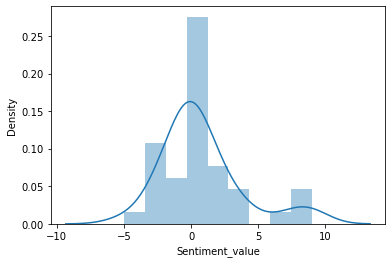

In [80]:
sns.distplot(sent_df['Sentiment_value'])

C:\Users\SARAN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_count', ylabel='Density'>

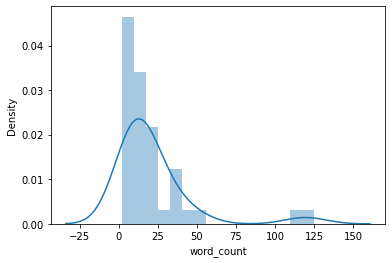

In [81]:
sns.distplot(sent_df['word_count']) # creating word count graph to compare both above and below word count for every word in the document

<AxesSubplot:xlabel='word_count', ylabel='Sentiment_value'>

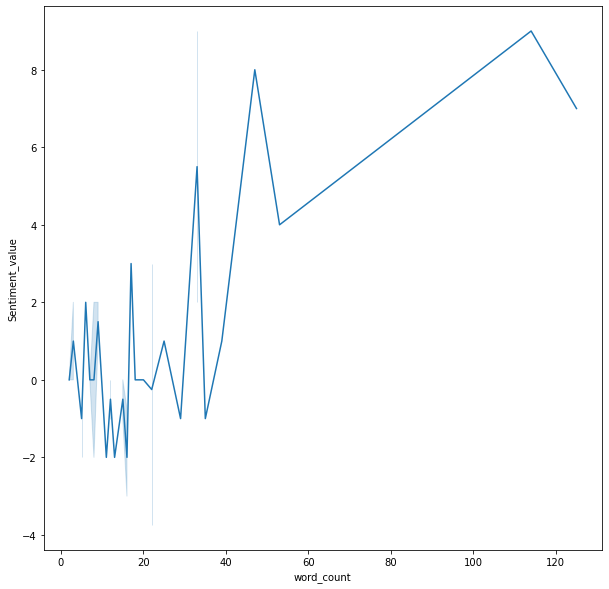

In [82]:
plt.figure(figsize=(10,10))
sns.lineplot(y='Sentiment_value', x='word_count',data=sent_df)

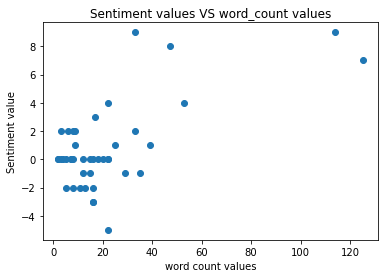

In [83]:
#scatter plot
figsize=(8,8)
plt.xlabel("word count values")
plt.ylabel("Sentiment value")
plt.title("Sentiment values VS word_count values")
plt.scatter(y='Sentiment_value', x='word_count',data=sent_df)